# Challenge: Make Your Network

[Boxing bout data](https://www.kaggle.com/slonsky/boxing-bouts) acquired from Kaggle.

In [41]:
import pandas as pd
import numpy as np
from sklearn.neural_network import BernoulliRBM
import matplotlib.pyplot as plt

raw_data = pd.read_csv('./boxing_bouts.csv')
print(raw_data.shape)
raw_data.head()

(387427, 26)


,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [35]:
df = raw_data.copy()

df['stance_A'] = df['stance_A'].apply(lambda x: 1 if x == 'orthodox' else 0)
df['stance_B'] = df['stance_B'].apply(lambda x: 1 if x == 'orthodox' else 0)

df['age_diff'] = df['age_A'] - df['age_B']
df['height_diff'] = df['height_A'] - df['height_B']
df['reach_diff'] = df['reach_A'] - df['reach_B']
df['same_stance'] = df['stance_A'] == df['stance_B']
df['weight_diff'] = df['weight_A'] - df['weight_B']

df['num_bouts_A'] = df['won_A'] + df['lost_A'] + df['drawn_A'] + df['kos_A']
df['num_bouts_B'] = df['won_B'] + df['lost_B'] + df['drawn_B'] + df['kos_B']
df['num_bouts_diff'] = df['num_bouts_A'] - df['num_bouts_B']

df['win_perc_A'] = (df['won_A'] + df['kos_A']) / df['num_bouts_A']
df['win_perc_B'] = (df['won_B'] + df['kos_B']) / df['num_bouts_B']

df = df.drop(columns=['judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A', 'judge3_B'], axis=1)

df.head(15)

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,age_diff,height_diff,reach_diff,same_stance,weight_diff,num_bouts_A,num_bouts_B,num_bouts_diff,win_perc_A,win_perc_B
0,35.0,27.0,179.0,175.0,178.0,179.0,1,1,160.0,160.0,...,8.0,4.0,-1.0,True,0.0,70,85.0,-15.0,1.000000,0.976471
1,26.0,31.0,175.0,185.0,179.0,185.0,1,1,164.0,164.0,...,-5.0,-10.0,-6.0,True,0.0,84,85.0,-1.0,0.976190,0.964706
2,28.0,26.0,176.0,175.0,NaN,179.0,1,1,154.0,154.0,...,2.0,1.0,NaN,True,0.0,37,82.0,-45.0,0.972973,0.975610
3,25.0,29.0,175.0,174.0,179.0,180.0,1,1,155.0,155.0,...,-4.0,1.0,-1.0,True,0.0,80,53.0,27.0,0.975000,0.943396
4,25.0,35.0,175.0,170.0,179.0,170.0,1,1,155.0,NaN,...,-10.0,5.0,9.0,True,NaN,79,77.0,2.0,0.974684,0.948052
5,24.0,31.0,175.0,175.0,179.0,178.0,1,1,NaN,NaN,...,-7.0,0.0,1.0,True,NaN,77,61.0,16.0,0.974026,0.983607
6,23.0,31.0,175.0,175.0,179.0,188.0,1,1,155.0,155.0,...,-8.0,0.0,-9.0,True,0.0,76,34.0,42.0,0.973684,0.911765
7,23.0,31.0,175.0,177.0,179.0,175.0,1,1,155.0,NaN,...,-8.0,-2.0,4.0,True,NaN,74,43.0,31.0,0.972973,0.930233
8,36.0,23.0,173.0,175.0,183.0,179.0,1,1,152.0,NaN,...,13.0,-2.0,4.0,True,NaN,70,73.0,-3.0,1.000000,0.986301
9,27.0,22.0,177.0,175.0,183.0,179.0,0,0,NaN,NaN,...,5.0,2.0,4.0,True,NaN,40,72.0,-32.0,1.000000,0.986111


In [99]:
num_nulls = df.isnull().sum()
df = df.dropna()
print('Drop nulls:')
print(num_nulls)

Drop nulls:
age_A             0
age_B             0
height_A          0
height_B          0
reach_A           0
reach_B           0
stance_A          0
stance_B          0
weight_A          0
weight_B          0
won_A             0
won_B             0
lost_A            0
lost_B            0
drawn_A           0
drawn_B           0
kos_A             0
kos_B             0
result            0
decision          0
age_diff          0
height_diff       0
reach_diff        0
same_stance       0
weight_diff       0
num_bouts_A       0
num_bouts_B       0
num_bouts_diff    0
win_perc_A        0
win_perc_B        0
dtype: int64


In [73]:
X_cols = list(filter(lambda x: x not in ['result', 'decision'], df.columns))

X = df[X_cols]
Y = df['result']

In [89]:
rbm = BernoulliRBM(n_components=3)
rbm.fit(X)

rbm.components_

array([[ 1.94130651e+04,  2.05009060e+04,  1.31029548e+05,
         1.30469997e+05,  1.35150421e+05,  1.34455736e+05,
         2.61292473e-01,  1.90061490e-01,  1.16956056e+05,
         1.17360268e+05,  2.30582661e+04,  2.08394652e+04,
         2.28342909e+03,  4.79506621e+03,  6.31992146e+02,
         8.74657535e+02,  1.30655308e+04,  1.14440346e+04,
        -1.08791581e+03,  1.59305869e+00,  1.18176193e+01,
         1.50480873e+00, -4.04630211e+02,  4.12720206e+04,
         4.01996600e+04,  4.00665995e+02,  3.50621461e-01,
         2.77305925e-01],
       [ 1.94152532e+04,  2.05038236e+04,  1.31046468e+05,
         1.30486993e+05,  1.35167697e+05,  1.34473285e+05,
         3.74688647e-01,  3.11132317e-01,  1.16970889e+05,
         1.17375098e+05,  2.30618272e+04,  2.08426658e+04,
         2.28344360e+03,  4.79530159e+03,  6.32063492e+02,
         8.74711585e+02,  1.30681629e+04,  1.14463574e+04,
        -1.08864675e+03,  1.52008435e+00,  1.15207212e+01,
         1.59890750e+00, -4.04

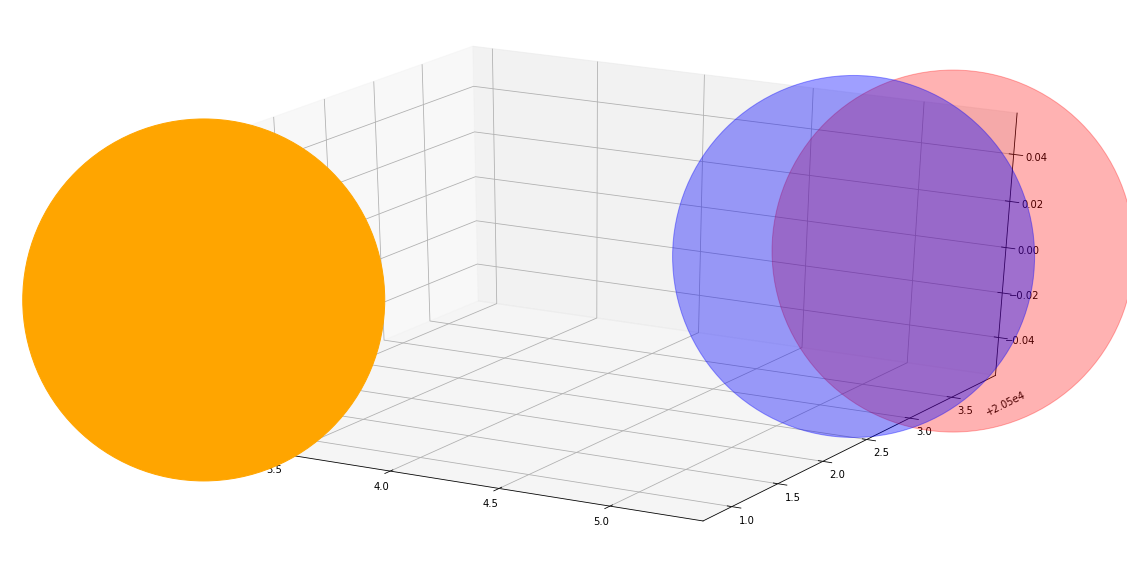

In [96]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(rbm.components_[:, 0], rbm.components_[:, 1], rbm.components_[:, 2], c=['orange', 'red', 'blue'])
plt.show()